## Short Tutorial Working With Multiple Cohorts
When working with multiple cohorts plotting can't be performed with the *Cohort* class methods, instead, import multi plot functions. Let's create some cohorts first.

In [1]:
from pyfreya import create_cohort
import datetime

new_users_facebook = 100
days_since_install_facebook = [1, 7, 30]
retention_values_facebook = [50, 15, 5]
facebook = create_cohort(new_users_facebook, days_since_install_facebook, retention_values_facebook, 
                         name='Facebook')

new_users_google = 150
days_since_install_google = [1, 10, 25]
retention_values_google = [50, 10, 1]
google = create_cohort(new_users_google, days_since_install_google, retention_values_google, 
                         name='Google')

Lets plot their retention

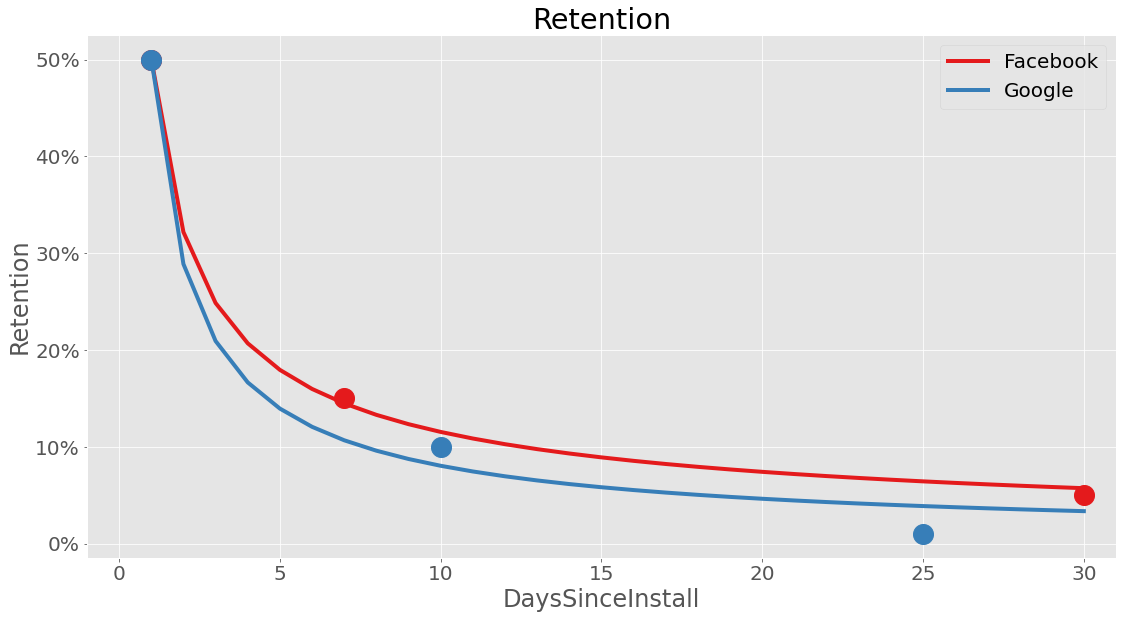

In [2]:
from pyfreya import multi_cohort_ret_plot

cohorts = [facebook, google]

multi_cohort_ret_plot(cohorts)

If copies of the Facebook cohort comes in each day in 10 days and copies of the Google cohort comes in 6 days in a row - what does DAU look like?

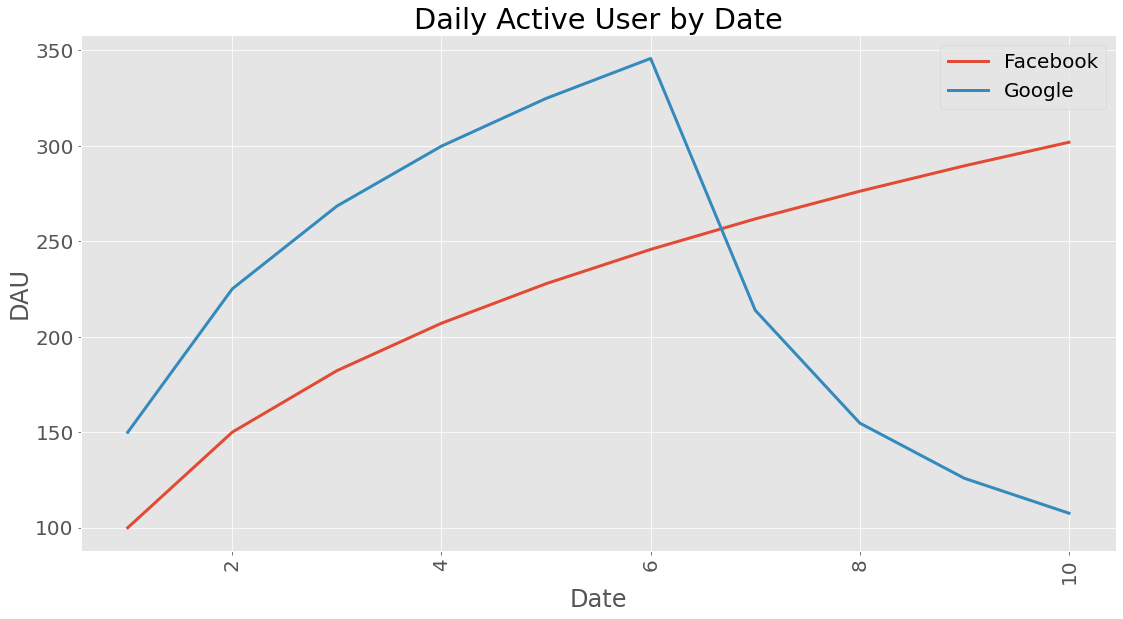

In [3]:
from pyfreya import multi_cohort_dau_plot

facebook.replicate_cohort(10)
google.replicate_cohort(6, 4) # Note that we want to age this cohort for additional 4 days, but with no new users.
google.df_dau
multi_cohort_dau_plot(cohorts)

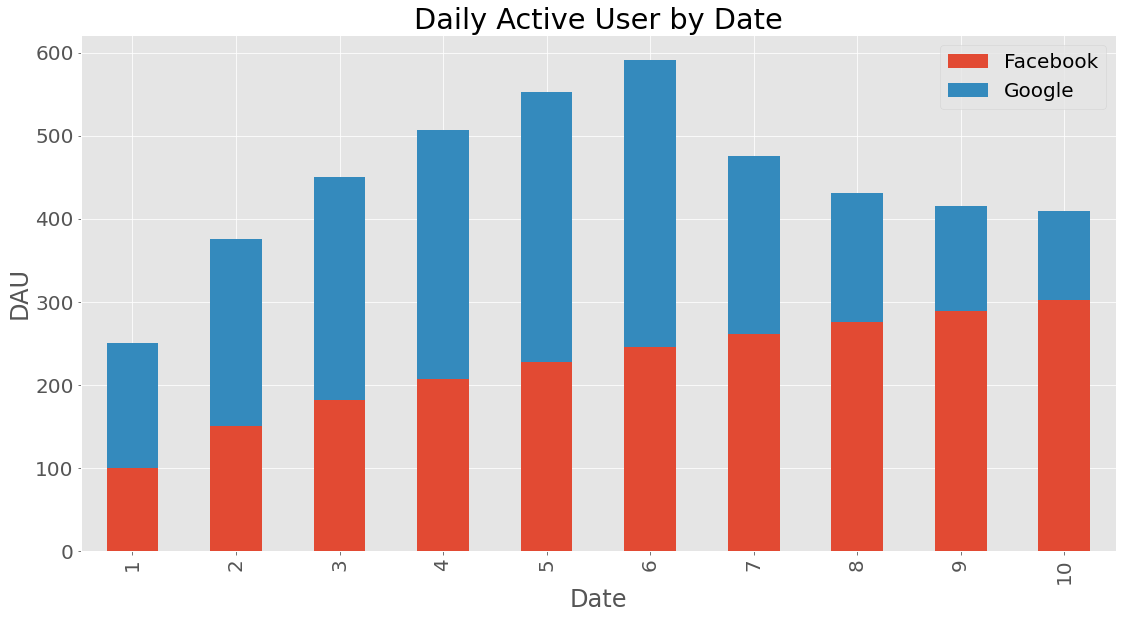

In [4]:
multi_cohort_dau_plot(cohorts, kind='bar')

How does revenue look across this? Lets apply a revenue profile and take a look.

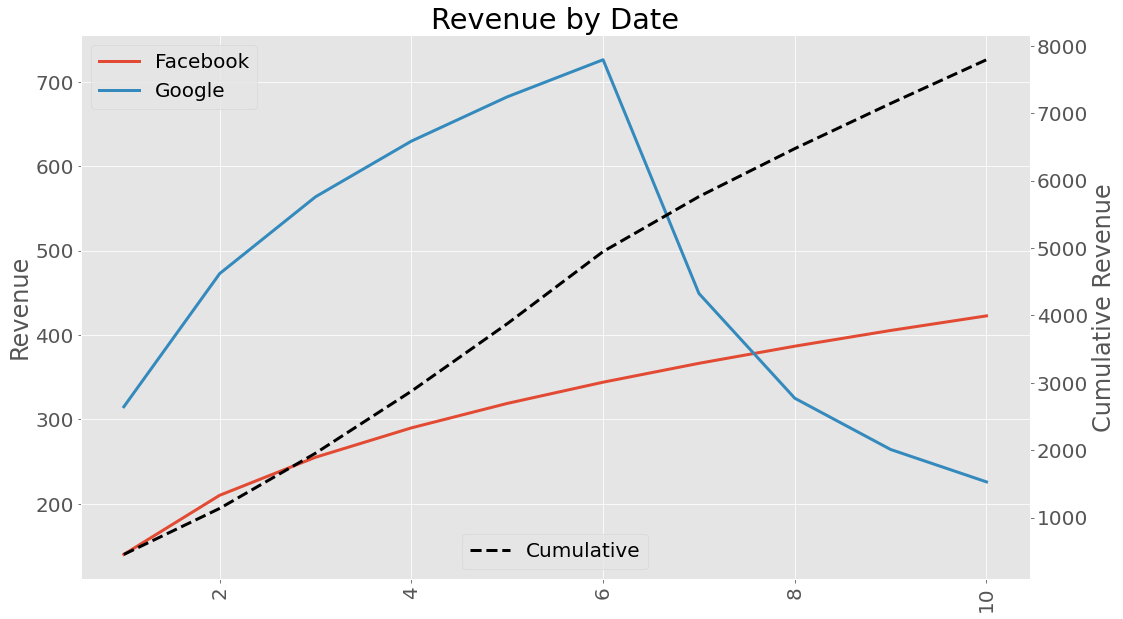

In [5]:
from pyfreya import multi_cohort_rev_plot
from pyfreya.revenue import ARPDAU

facebook.apply_revenue(ARPDAU(1.4))
google.apply_revenue(ARPDAU(2.1))

multi_cohort_rev_plot(cohorts)

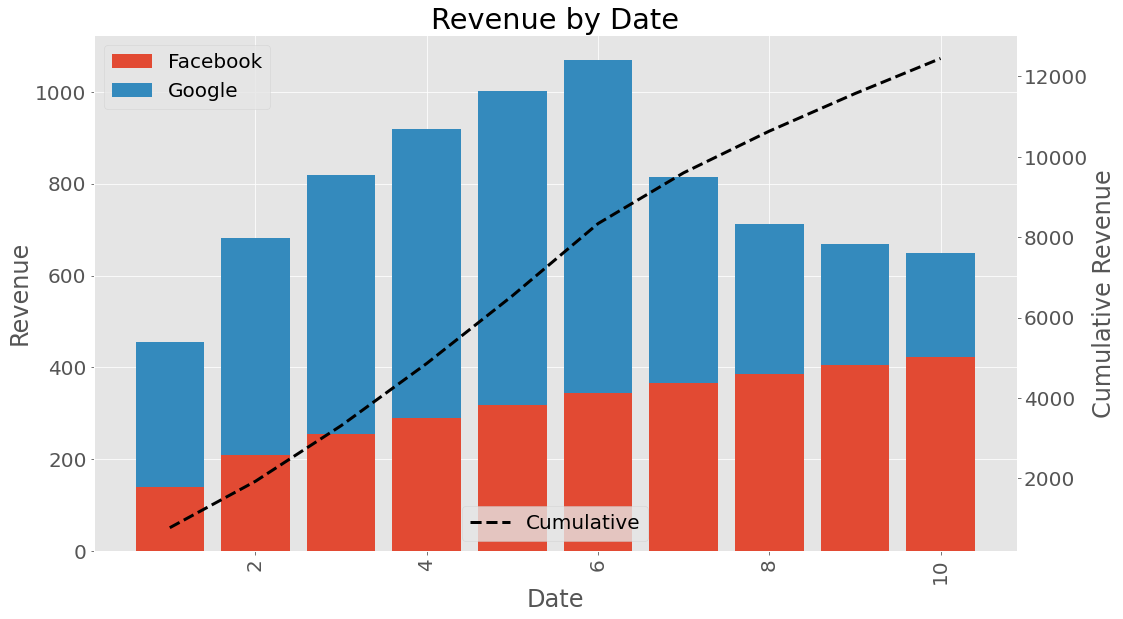

In [6]:
multi_cohort_rev_plot(cohorts, kind='bar')

If we are interested in uncertainties the [Uncertainties](https://pypi.org/project/uncertainties/) package have been implemented. This can be used the following way:

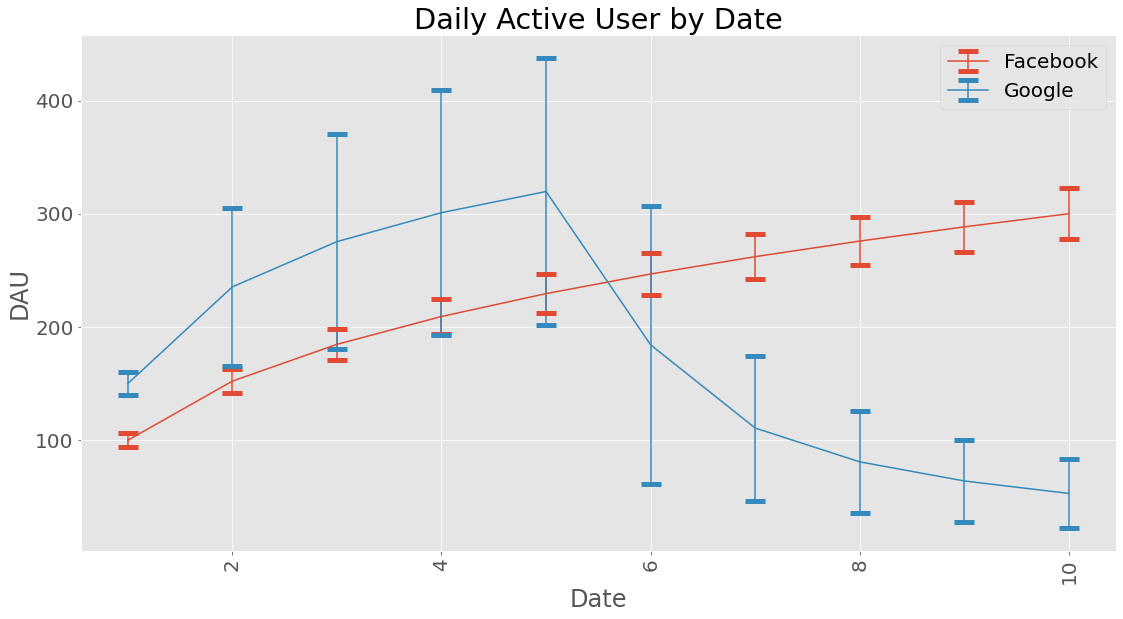

In [7]:
from pyfreya import ufloat

new_users_facebook = ufloat(100, 6)
days_since_install_facebook = [1, 7, 30]
retention_values_facebook = [ufloat(50, 2), ufloat(15, 0.5), ufloat(5, 0.1)]
facebook = create_cohort(new_users_facebook, days_since_install_facebook, retention_values_facebook, 
                         name='Facebook')

new_users_google = ufloat(150, 10)
days_since_install_google = [1, 10, 25]
retention_values_google = [ufloat(50, 3), ufloat(10, 0.4), ufloat(1, 0.1)]
google = create_cohort(new_users_google, days_since_install_google, retention_values_google, 
                         name='Google')

cohorts = [facebook, google]

facebook.replicate_cohort(10)
google.replicate_cohort(5, 5)

facebook.apply_revenue(ARPDAU(ufloat(1.4, 0.2)))
google.apply_revenue(ARPDAU(ufloat(2.1, 0.4)))
multi_cohort_dau_plot(cohorts)

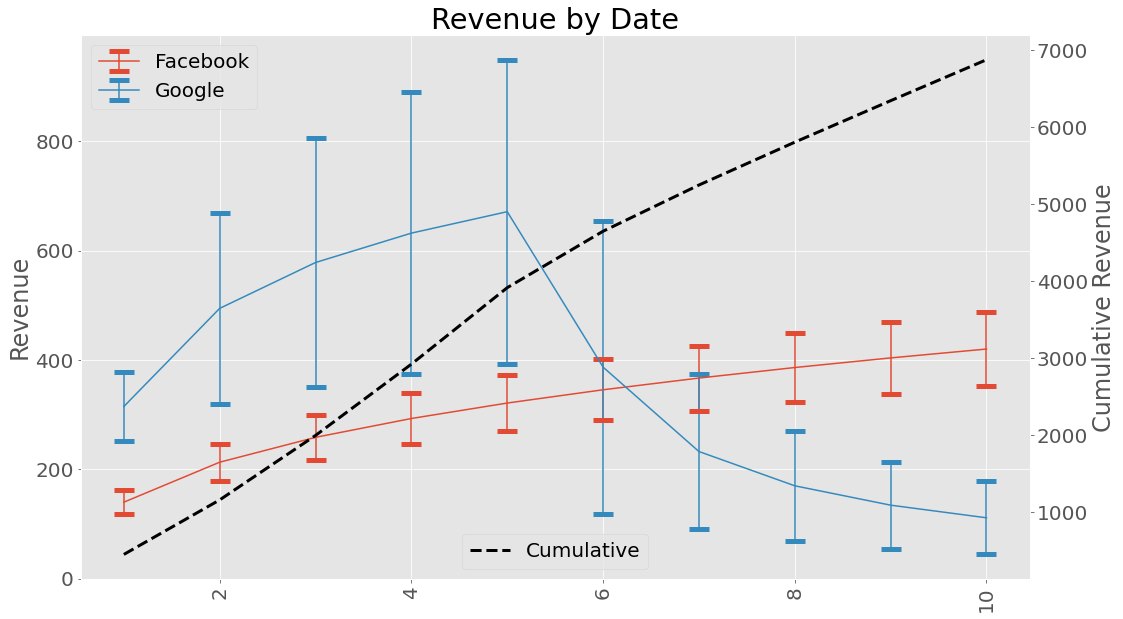

In [8]:
multi_cohort_rev_plot(cohorts)

When working with uncertainties, the nominal values and the uncertainty values can be obtained with functions `nominal_values` and `std_devs`, respectively:

In [9]:
from pyfreya import nominal_values, std_devs

facebook.df_dau['dau']

Date
1      100+/-6
2     152+/-10
3     185+/-13
4     209+/-16
5     230+/-17
6     247+/-19
7     262+/-20
8     276+/-21
9     288+/-22
10    300+/-23
Name: dau, dtype: object

In [10]:
nominal_values(facebook.df_dau['dau'])

array([100.        , 152.2302569 , 184.70997132, 209.30960342,
       229.50731853, 246.84077882, 262.13821507, 275.9019684 ,
       288.46204483, 300.04808586])

In [11]:
std_devs(facebook.df_dau['dau'])

array([ 6.        , 10.49918186, 13.4983251 , 15.64446572, 17.31653098,
       18.69011938, 19.85918453, 20.87961789, 21.78730166, 22.60661843])